# Using Visualization and Algorithms in Python To Inform Machine Learning: A Tutorial for Beginners
### By **Veronica Helms** as part of the [Georgetown Data Science Certificate Program](http://scs.georgetown.edu/programs/375/data-science/) under [Dr. Rebecca Bilbro](http://scs.georgetown.edu/departments/5/center-for-continuing-and-professional-education/faculty-bio/4120569/rebecca-bilbro)

This machine learning tutorial is for python and Scikit-Learn beginners with minimal coding experience. It describes each programming step in simple terms and provides definitions and detailed explanations from start to finish.

Focusing on supervised machine learning using classification, this tutorial explores four machine learning algorithms in Python using *pandas* (a python data analytics package) and Scikit-Learn (a python machine learning package). 

<font color='blue'>**Processes described below include:** </font> 
1. Data selection and ingestion
2. Basic data wrangling
3. Data exploration using visualization techniques
4. Feature selection
5. One linear algorithm, logistic regression
6. Three nonlinear machine learing algorithms:
    - K-nearest neighbors
    - Naive bayes
    - Classification and regression trees (CART)

# Step One: Select A Dataset

The University of California, Irvine [(UCI) Machine Learning Repository](http://archive.ics.uci.edu/ml/index.html) maintains over 350 datasets. It  provides a repository for the machine learning community by collecting databases for the analysis of machine learning algorithms.

The UCI repository can be overwhelming for beginners. It is a prime example of the [Paradox of Choice](https://en.wikipedia.org/wiki/The_Paradox_of_Choice). My recommendation would be to first filter based on two items. First, what kind of machine learning are you interested in? Clustering, classification, etc.? Second, what domain area interests you? Make sure you are interested in the set you choose!

Once you've established these two factors, selecting a dataset is much less overwhelming since UCI can filter based on many factors, including: key type of machine learning requested (i.e., clustering); attribute type (categorical, integar, etc.); number of attributes (rows); number of instances (columns); data type (multivariate, text, spatial, etc.); year; domain area (social sciences, physical sciences, life sciences, etc.), and format type (matrix versus non-matrix).

When exploring UCI for a dataset for this post, I wanted to meet two criterion. First, I wanted to work with a dataset in either the social sciences or life sciences domain area. Second, I wanted to to try regression or classification machine learning.  

For this tutorial, I will use the [**Contraceptive Method Choice Dataset**](http://archive.ics.uci.edu/ml/datasets/Contraceptive+Method+Choice) since it meets both my interests.

# Step Two: Establish Rudimentary Knowledge of the Dataset

I always begin by spending about 10 minutes reviewing my dataset. I download the raw CSV and look at the structure. When texts files are provided, I review variable names and descriptions. For most UCI datasets, a short explanation is provided.

My selected *Contraceptive Method Choice* dataset has 9 attributes (columns) and 1,473 instances (rows). Attributes are categorical and integer. This dataset is a subset of the 1987 National Indonesia Contraceptive Prevalence Survey. 

The sample frame includes married women who were either not pregnant or did not know if they were pregnant at the time of interview. 

The ten attributes are: 
1. Wife's age
2. Wife's education
3. Husband's education
4. Number of children ever born
5. Wife's religion
6. Wife's current work status at the time of interview
7. Husband's occupation
8. Standard-of-living index
9. Media exposure
10. **Contraceptive method used** (which is also the outcome variable of interest)

# Step Three: Determine the Problem/Task

Before I start, it is important to understand the project goal. Otherwise, it would be meaningless data mining!         

According to the author, the task is to predict the current contraceptive method choice (no use, long-term methods, or short-term methods) of a woman based on her demographic and socioeconomic characteristics.

# Step Four: Import Dependencies

When I first starting learning python, I would just copy dependencies from other programs without realizing what I was copying. After I started to get comfortable with coding in python, I decided to decipher the exact function of each dependency used. 

**Termninology Check: After some research, I thought the following definition  was the most cogent definition of a dependency for beginners: "[Application dependencies are the libraries other than your project code that are required to create and run your application.](https://www.fullstackpython.com/application-dependencies.html)." Dependencies can also be called applications or modules.**        

Now - I'll explain the function of each of the dependencies that I will use in the next step:
* **import os**: This crucial application essentially allows your program to interface with your underlying operating system (Mac, Windows, etc.).          
* **import pandas as pd**: This application allows for the use of pandas. Historically, python is good at data ingestion/munging, but leaves much to be desired when conducting analysis. Pandas is a python library that can be used for data analysis.  
* **import csv**: This library is useful for working with CSV files, which are text files formatted with commas to seperate values.                                                       
* **import requests**: This module allows you to send HTTP/1.1 requests. Essentially, it allows you to call a URL.  
* **import seaborn**: This application is a visualization library that allows you to draw attractive statistical graphics and figures.
      
**Tip**: Make sure you've downloaded each of the packages prior to calling them. I did this by using the [pip install function](https://packaging.python.org/installing/) in the terminal.

In [230]:
import os
import pandas as pd # "as pd" allows you to type pd. rather than pandas when calling it moving forward.#
import csv
import requests   
import seaborn as sns # "as sns" allows you to type sns. rather than seaborn. when calling it moving forward.#

# Step Five: Download Data

For all of the UCI Machine Learning Repository datasets, URLs are provided for direct download. Now, I will walk through the processes utilized to call the data.

The step below creates an object called CONTR_DATASET that specifies the URLs where the data is stored the on UCI page.

In [231]:
CONTR_DATASET = (
    "http://archive.ics.uci.edu/ml/machine-learning-databases/cmc/cmc.data",
    "http://archive.ics.uci.edu/ml/machine-learning-databases/cmc/cmc.names",
)

Here are step-by-step explanations for the code block below. 

* The def download_data function specifies the details needed to download the data into my working directory. 
  * It creates a path called "data" in my working directory (similar to a folder).  
 * The urls= function calls in the URL bundle I specified in the step above (called CONTRA_DATASET). 
  
* The next statement ("if not...") essentially says that if the path doesn't already exist, then make the directory (os.mkdir).

* The url_name statement handles URL details. 
  * The response= line calls the requests module (discussed above) to send the HTTP/1.1 request. 
  * The url_name= line uses the os.path.basename function so I don't have to manually parse the URL myself.

**Terminology Check: "Parse" is a technical term that means to analyze a set of "data" (i.e., characters) and determine if the data is important.**

  * The "with open" uses the join function to connect the path to the URL and specifies that is should be parsed. 
    * The 'w' specifies that the file should be opened for writing only. 
    * The "as f" serves as a statement to create a dummy variable for where the content will be stored. 
      * The f.write statement calls the dummy f (which specified all download details) and says to write the content from the URL. 

* The download_data() statement at the end actually executes the data_download function based on all the details specified above.  

In [232]:
def download_data(path='contraception', urls=CONTR_DATASET):
    if not os.path.exists(path):
        os.mkdir(path)

    for url in urls:
        response = requests.get(url)
        url_name = os.path.basename(url)
        with open(os.path.join(path, url_name), 'w') as f:
            f.write(response.content)
            
download_data()

# Step Six: Create A Dataframe

Now that the data has been downloaded successfully, I will create a DataFrame in *pandas*.

**Terminology Check: Put simply, a DataFrame refers to the actual dataset. It often (but not always!) refers to "tabular" data. Tabular data is structured as cases (rows) and measurements (columns).** 

In this step, I will create a DataFrame called "data" using pandas (the pd. prior to read_csv statement). Remember that my path is called "contraception" so I need to specify the location after the read_csv statement.     

**Tip: Want to learn more about loading CSVs using pandas? Check out this [site](http://chrisalbon.com/python/pandas_dataframe_importing_csv.html) which offers simple explanations.**                  

In [233]:
data = pd.read_csv('contraception/cmc.data')

# Step Seven: Preliminary Raw Data Exploration

Now, I will take a look at the DataFrame that I just created. I will use the head function to return the first 5 rows of data.

In [234]:
data.head(5)

,24,2,3,3.1,1,1.1,2.1,3.2,0,1.2
0,45,1,3,10,1,1,3,4,0,1
1,43,2,3,7,1,1,3,4,0,1
2,42,3,2,9,1,1,3,3,0,1
3,36,3,3,8,1,1,3,2,0,1
4,19,4,4,0,1,1,3,3,0,1


Even from this simple function, we can see that the CSV doesn't include headers; therefore, I need to add headers to the dataset.

# Step Eight: Basic Data Manipulation

I will load the CSV again but specify column names this time. I needed reference the initial documentation (a text file called cmc.names) to understand what columns are associated with each of the 10 variables in the dataset.

In [236]:
data = pd.read_csv('contraception/cmc.data',
                 names=['age', 'w_educat', 'h_educat', 'num_child', 'w_religion', 'w_worknow', 'h_occupat', 
                        'SOL', 'media', 'method'])

Now, let's view the file again using the head function. It looks great now!

In [237]:
data.head(5)

,age,w_educat,h_educat,num_child,w_religion,w_worknow,h_occupat,SOL,media,method
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1


# Step Nine: More Data Exploration

Now that I know the basic structure of the file, I will take a deeper dive into the data. The describe function can be used to generate summary statistics. 

From the count row, I can see that there are no missing values. This is consistent with what the UCI site specifies. From the mean, min, and max rows, I can estimate the variance of the dataset attributes. Most of the attributes are categorical, but age and number of children appears to be continuous/numeric.

In [238]:
data.describe()

,age,w_educat,h_educat,num_child,w_religion,w_worknow,h_occupat,SOL,media,method
count,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000
mean,32.538357,2.958588,3.429735,3.261371,0.850645,0.749491,2.137814,3.133741,0.073999,1.919891
std,8.227245,1.014994,0.816349,2.358549,0.356559,0.433453,0.864857,0.976161,0.261858,0.876376
min,16.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
25%,26.000000,2.000000,3.000000,1.000000,1.000000,0.000000,1.000000,3.000000,0.000000,1.000000
50%,32.000000,3.000000,4.000000,3.000000,1.000000,1.000000,2.000000,3.000000,0.000000,2.000000
75%,39.000000,4.000000,4.000000,4.000000,1.000000,1.000000,3.000000,4.000000,0.000000,3.000000
max,49.000000,4.000000,4.000000,16.000000,1.000000,1.000000,4.000000,4.000000,1.000000,3.000000


Next - I will employ some common sense. What kind of characteristics would I expect to be associated with contraception method choice? Given my domain expertise in maternal and child health, I think wife's education will be a key indicator. I will plot that indicator with method choice and take a look at the distribution. 

Below, I created Dataframe called view that uses seaborn (sns) to plot the y variable (education) with the outcome method (specified by hue=). The data statement specifies the dataset that will be used to plot. 

**Tip: Note that to get the plots to show up in iPython/Jupyer notebook, the inline backend command is "%matplotlib inline."**

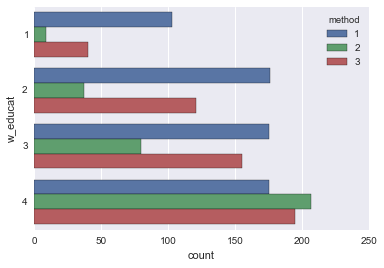

In [239]:
%matplotlib inline 

view = sns.countplot(y='w_educat', hue='method', data=data,)

*From the plot, I see that contraception methods varied based on wife's education.* 

Now, I will try another. What about religion? Note the binary values for this attribute are: 0=Non-Islam and 1=Islam.          

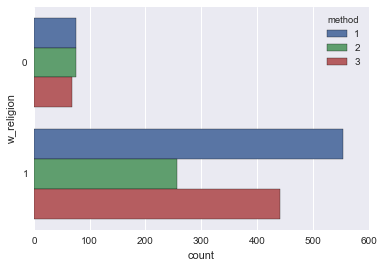

In [240]:
view = sns.countplot(y='w_religion', hue='method', data=data,)                                                                                  #   

*From the plot, it appears that among Islamic women, methods varied. Among non-Islamic women, methods were utilized fairly evenly. That being said, the sample overwhelmingly consisted of Islamic women.* 

Let me try one last indicator. I think media exposure will be an interesting attribute to explore. Note the binary values for this attribute: 0=Good and 1=Not good.

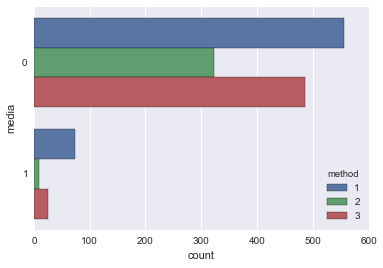

In [241]:
view = sns.countplot(y='media', hue='method', data=data,)

*From this plot, I think the main takeaway is that most women in the sample have good media exposure and that contraception type varied in both media exposure groups.*

Let's try one last one. What about the standard-of-living index? Note the categorical, ordinal values for this attribute: 1=low, 2, 3, 4=high.

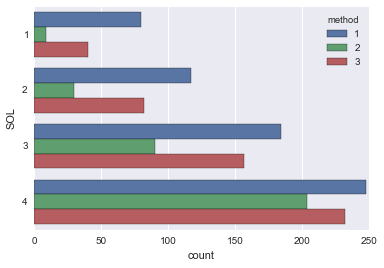

In [242]:
view = sns.countplot(y='SOL', hue='method', data=data,)

*From the plot, we see that method distribution was similar across all groups. Preliminary bivariate analysts suggests that this indicator is not a key predictor of contraception choice.* 

I will also try some pairplots with the dataset. Pairplots will allow me to plot each feature against every other feature. I will first try a pairplot with the outcome (contraception method) against all features.

In this step, I create a dataframe called try_all, use seaborn (sns) to specify a pairplot uses the dataset called data and specifying method as the outcome variables to plot against. 

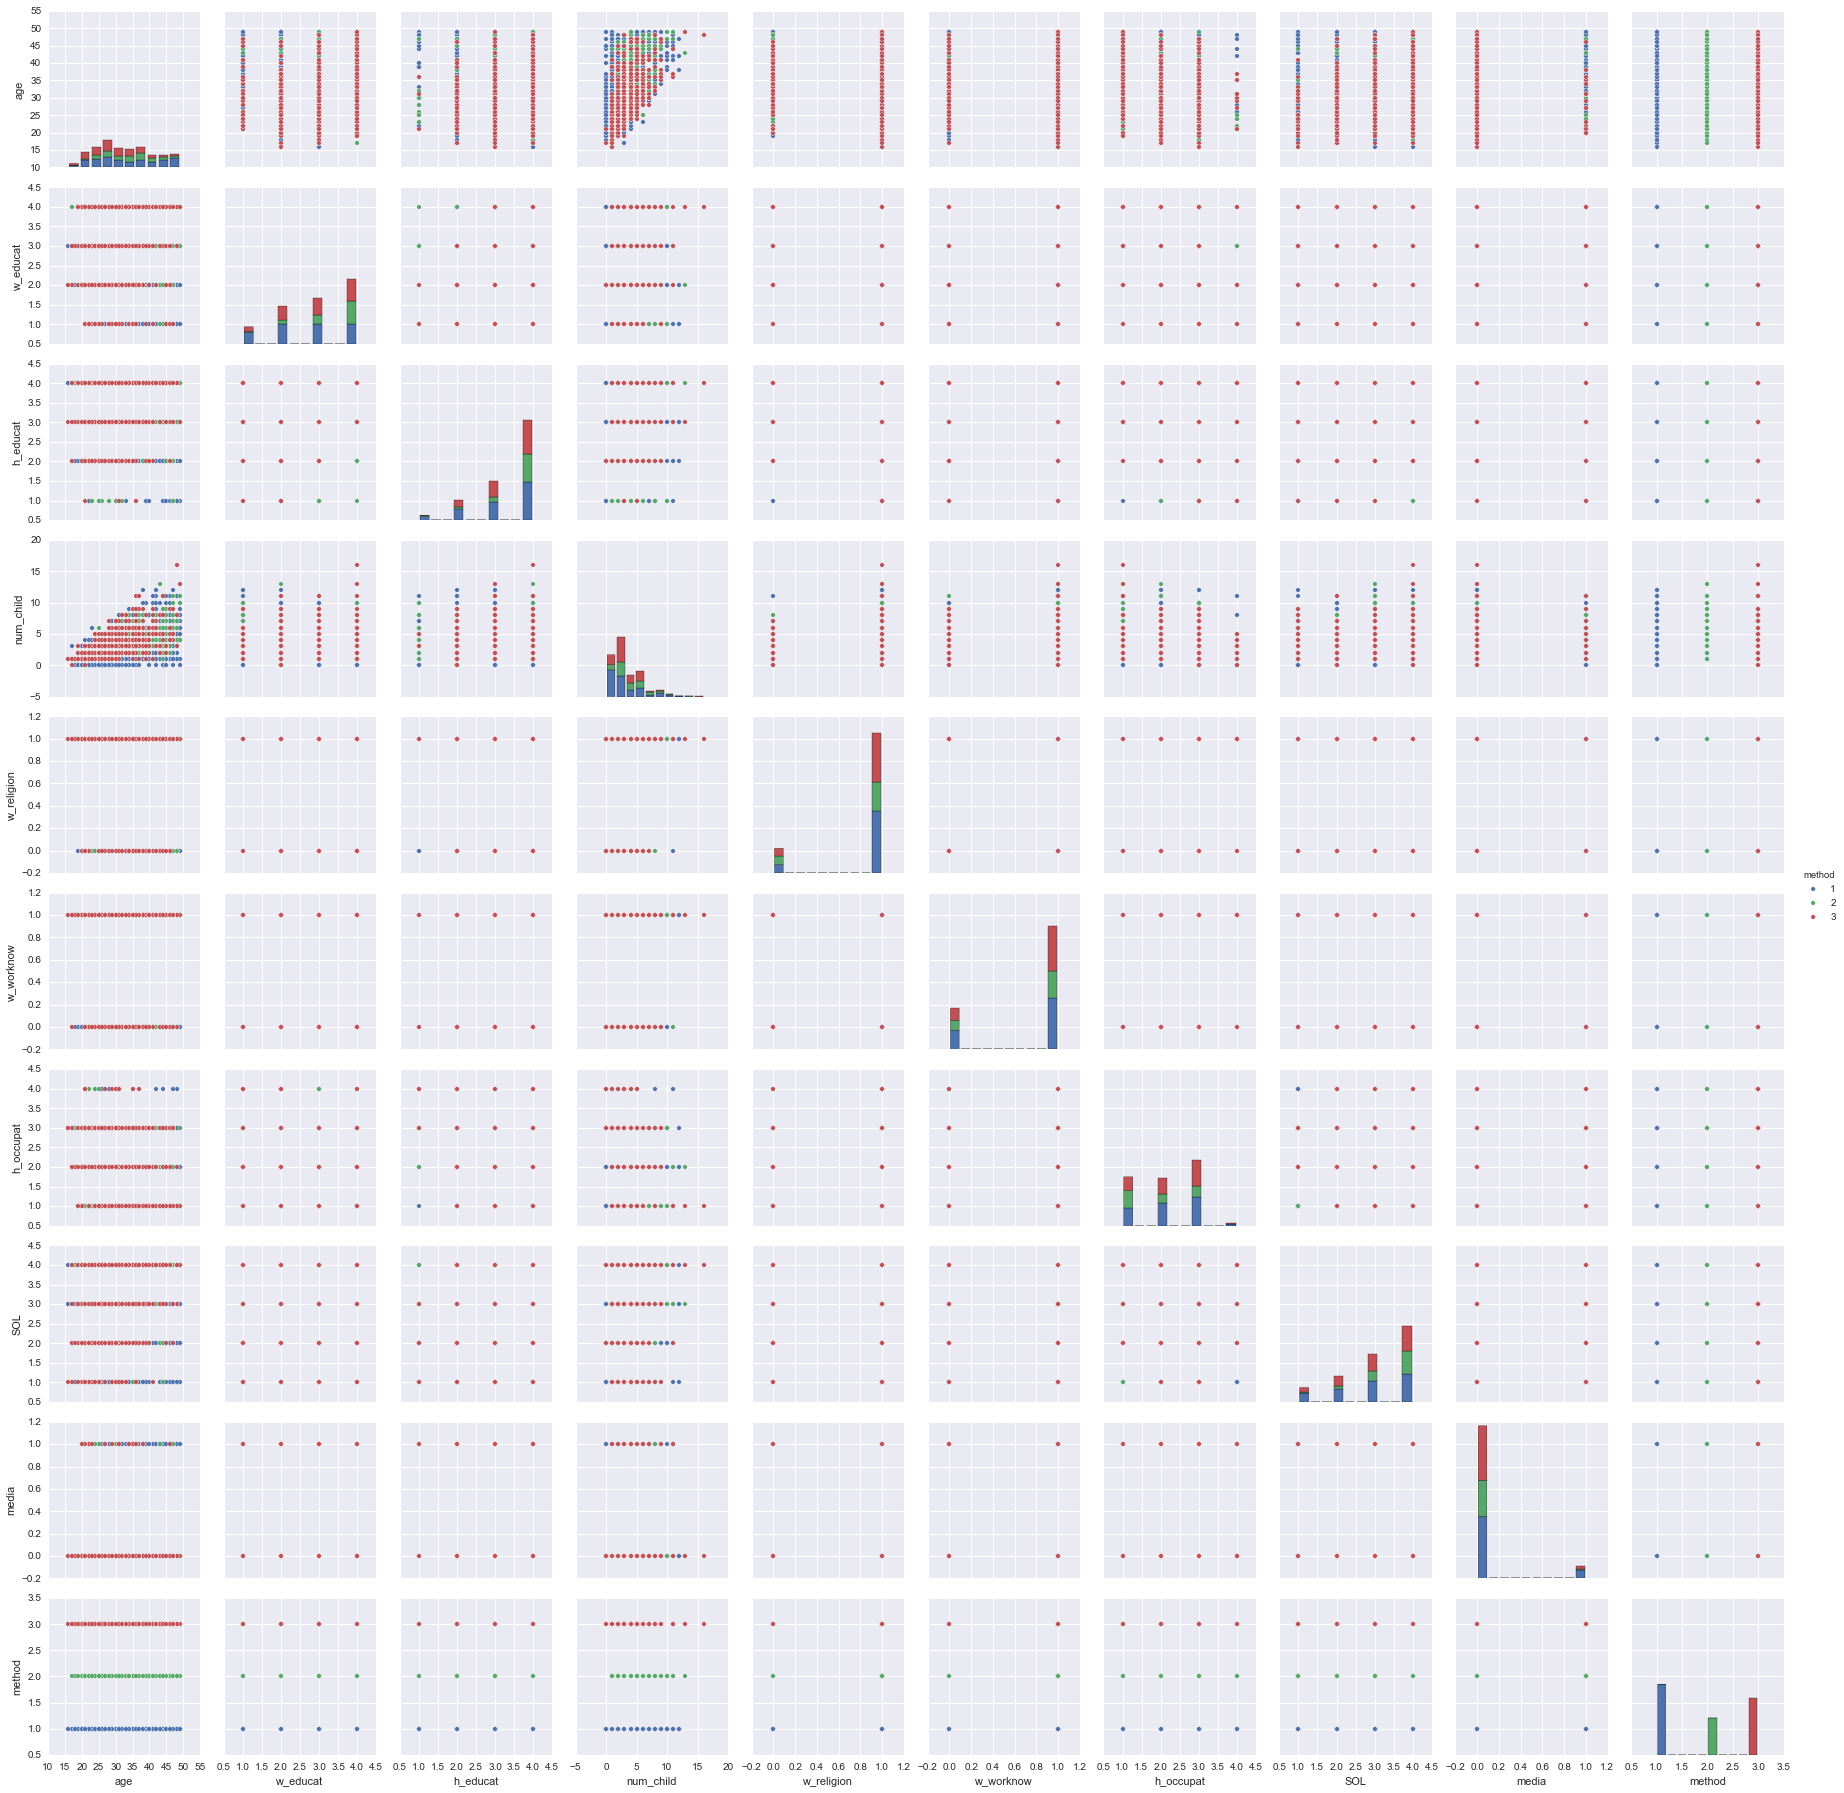

In [243]:
try_all = sns.pairplot(data, hue='method')

*This output is a little overwhelming so I will try to subset the output to improve readability. For the new pairplot, I will only plot the continuous variables (age and number of children).*   

Note that in the code below, I specify which variables I want to plot in the pairplot. If you don't specify (as I did in the preceeding step), all variables will be used. The dropna feature excludes missing values. 

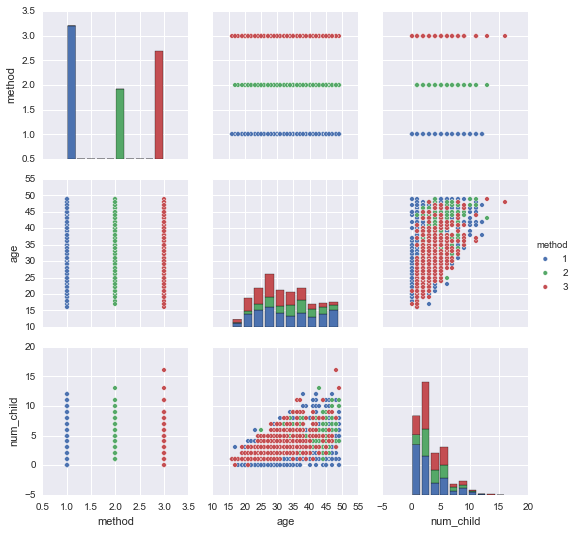

In [245]:
continous = sns.pairplot(data=data[['method', 'age', 'num_child',]], hue='method', dropna=True)

*Results suggest that Method 3 was more common among younger women. Additionally, number of children appears to be predictive of method choice.*

# Step Ten: Feature Selection - Split Features from Target

Since I am doing classification, it is wise to use feature selection to identify meaningful attributes prior to model selection.                                    

Why select features for machine learning? The goal is to find the smallest set of the available features to allow for the model to reach maximal predictive value. It promotes efficiency via three main ideas: 
1. Less complexity reduces bias
2. Lower dimensional space equals less computation time, and
3. Fewer variables  allows for better interpretability.      

There are four main feature selection approaches: 
* **Domain Expertise**: This approach requires intimate knowledge of the subject matter at hand. Typically, other programming approaches are utilized unless subject-matter experts are a part of the data science team.         
* **Regularization Techniques**
* **Transformer Methods** 
* **Dimensionality Reduction**                          

I will now walk through the last three programming approaches for feature selection.                               

First, I will seperate the features and the target variable (contraception method). I will create two dataframes -- one for the features called "features" and one for the target called "target."

In [246]:
features = data[['age', 'w_educat', 'h_educat', 'num_child', 'w_religion', 'w_worknow', 'h_occupat', 
                        'SOL', 'media',]]
target  = data['method']

I will now print those features to make sure it worked.                                           

In [247]:
list(features)

['age',
 'w_educat',
 'h_educat',
 'num_child',
 'w_religion',
 'w_worknow',
 'h_occupat',
 'SOL',
 'media']

Success!

# Step Eleven: Feature Selection - Regularization Techniques

For Regularization, I will use three techniques: 
1. Lasso
2. Ridge Regression, and
3. Elastic Net

I will provide a brief explanation for each below. But first - what is regularization? Regularization is a technique used to counteract overfitting statistical models. If you overfit a model, results are often bias and/or inaccurate. Learn more [here](https://people.eecs.berkeley.edu/~russell/classes/cs194/f11/lectures/CS194%20Fall%202011%20Lecture%2004.pdf).   

The first step is to specify the imports needed for regularization techniques. In the code block below, I call in feature selection and linear model packages from Scikit-Learn. 

In [249]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Ridge, Lasso, ElasticNet

Let's start with LASSO which stands for Least Absolute Shrinkage and Selection Operato. It essentially forces weak features to have zeroes as coefficients. LASSO effectively drops the least predictive features. 

**Check out the Scikit-Learn documentation for [LASSO](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html).** 

The code block below simplifies the process as much as possible. The first line states that the lasso model will be used, the second line fits both the features and the target datasets created above in step 10, and the third line prints the results for all nine features. 

In [250]:
model = Lasso()
model.fit(features, target)
print(list(zip(features, model.coef_.tolist())))

[('age', -0.0025741062433928784), ('w_educat', 0.0), ('h_educat', 0.0), ('num_child', 0.0), ('w_religion', -0.0), ('w_worknow', 0.0), ('h_occupat', 0.0), ('SOL', 0.0), ('media', -0.0)]


*What do these results tell me? From the LASSO model, all features were revalued at zero except age. It doesn't appear that LASSO regression is a good technique for this dataset but now I will explore other techniques.* 

Next, I will do Ridge Regression. Ridge assigns every feature a weight. However, it spreads the coefficient values out more equally. By doing so, it maintains less predictive features but shrinks them at the same time. 

**Check out the Scikit-Learn documentation for [Ridge](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html).**

The following code simplifies the process by using very few parameters. The first line states that the ridge model will be used, the second line fits both the features and the target datasets created above in step 10, and the third line prints the results for all nine features. 

In [251]:
model = Ridge()
model.fit(features, target)
print(list(zip(features, model.coef_.tolist())))

[('age', -0.03382680201119142), ('w_educat', 0.12812343438260562), ('h_educat', 0.017126180630530525), ('num_child', 0.10939617051203662), ('w_religion', -0.09822927695627236), ('w_worknow', 0.0632573981783413), ('h_occupat', 0.06104638044051742), ('SOL', 0.08263653613475036), ('media', -0.16395876071585394)]


*What do these results tell me? The features with the highest weights (i.e., the most predictive) are wife's education, number of children, wife's religion, and media exposure.*

Lastly, I will do Elastic Net, a linear combination of Ridge and LASSO. Elastic Net essentially splits the difference.                                              

**Check out the Scikit-Learn documentation for [Elastic Net](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html).**

The following code simplifies the process by using very few parameters. The first line states that the Elastic Net model will be used, the second line fits both the features and the target datasets created above in step 10, and the third line prints the results for all nine features. 

In [252]:
model = ElasticNet(l1_ratio=0.10)
model.fit(features, target)
print(list(zip(features, model.coef_.tolist())))

[('age', -0.023299655390434316), ('w_educat', 0.02401923417511031), ('h_educat', 0.0), ('num_child', 0.050499851306929106), ('w_religion', -0.0), ('w_worknow', 0.0), ('h_occupat', -0.0), ('SOL', 0.0024444959533883653), ('media', -0.0)]


*What do these results tell me? The following features emerged as predictive: age, wife's education, standard-of-living index, and number of children. This is similar to the Ridge findings above.* 

# Step Twelve: Feature Selection - Transformer Methods

Scikit-Learn also has a meta-transformer method for selecting features based on importance weights. In this section, I will use the same three approaches above, but with the transformer functions.

Note that the transformer code is very similar to the step above but it specifies a fit function and also prints key predictors. 

First, LASSO. 

In [253]:
model = Lasso()
sfm = SelectFromModel(model)
sfm.fit(features, target)
print(list(features[sfm.get_support(indices=True)]))

['age']


*Age emerged as a key predictor. This is the same variable that emerged in LASSO without using the meta-transformer method.*

Next, Ridge.

In [254]:
model = Ridge()
sfm = SelectFromModel(model)
sfm.fit(features, target)
print(list(features[sfm.get_support(indices=True)]))

['w_educat', 'num_child', 'w_religion', 'media']


*Wife's education, number of children, wife's religion, and media exposure emerged as predictive variables. Again, this is consisent with the findings in the preceeding step.* 

Lastly, ElasticNet with a transformer function. 

In [255]:
model = ElasticNet()
sfm = SelectFromModel(model)
sfm.fit(features, target)
print(list(features[sfm.get_support(indices=True)]))

['age']


*Age is the only predictor that emerged from this procedure. This is different from non-transformed results.* 

# Step Thirteen: Feature Selection - Dimensionality Reduction

For dimensionality reduction, I will use two techniques: principal component analysis (PCA) and linear discriminant analysis (LDA). 

**Terminology Check: Dimensionality reduction is the process of reducing the number of random variables in a model by obtaining a set of principal variables.** 

As always, I will start by specifying the imports needed for this section. Note that I call in the matplotlib inline (described above), which allows me to view graphs in a Jupyter notebook. I also call in the packages from Scikit-Learn that allow me to conduct PCA and LDA. 

In [256]:
%matplotlib inline
from __future__ import print_function
#import mdtraj as md
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

Principal component analysis (PCA) is a type of linear dimensionality reduction using Singular Value Decomposition (SVD) of the data and keeping only the most significant singular vectors to project the data into a lower dimensional space. It is an unsupervised method that uses a signal representation criterion and identifies the combination of attributes that account for the most variance in the data.

**Check out the Scikit-Learn documentation for [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).** **Also, check out this great [tutorial](http://setosa.io/ev/principal-component-analysis/) which describes PCA.**

The first line of code specifies PCA will be used and n_components specifies the number of components to keep. The second line fits and transforms only the features and the third line prints those features. 

In [278]:
pca = PCA(n_components=2)
new_features = pca.fit(features).transform(features)
print(new_features)

[[ -8.45635118   1.30049601]
 [ 13.39601455   4.88358552]
 [ 10.93123803   2.1633727 ]
 ..., 
 [  7.18457284   3.33213329]
 [  0.55601177   0.78350848]
 [-15.66951971   0.17515196]]


*What does this mean? Without graphing PCA results, the newly printed features are meaningless.*

In the code block below, I print shape specifications for the newly transformed data. 

In [279]:
pca1 = PCA(n_components=2)
new_features = pca1.fit_transform(X, y=None)
print(new_features.shape)

(1473, 2)


*The data contains 1,473 rows in two dimensions.*

Now, let's graph the data. The code block below plots the new features run through PCA. The label and title statements provide an opportunity to label the output to improve readability. 

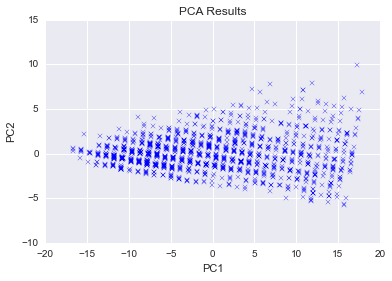

In [281]:
plt.figure()
plt.scatter(new_features[:, 0], new_features[:,1], marker='x')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Results')

Next, I will explore Linear discriminant analysis (LDA), a type of classifier with a linear decision boundary. LDA fits class conditional densities to the data. The model fits a Gaussian density to each class and assumes that all classes share the same covariance matrix. It is a supervised method that uses a classification criterion, and tries to identify attributes that account for the most variance between classes.

**Check out the Scikit-Learn documentation for [LDA](http://scikit-learn.org/0.16/modules/generated/sklearn.lda.LDA.html).** 

The first line of code specifies LDA will be used and n_components specifies the number of components to keep. The second line fits and transforms only the features and the third line prints those features. 

In [282]:
lda = LDA(n_components=2)
new_features = lda.fit(features, target).transform(features)
print(new_features)

[[-0.22544007  1.21685003]
 [ 0.37728275  0.71829433]
 [ 0.16847885  0.15376584]
 ..., 
 [ 1.4280335  -0.62676541]
 [-0.21192551 -0.26151768]
 [ 0.60132144  1.42829073]]


*What does this mean? Without graphingresults, the newly printed features are meaningless.*

In the code block below, I will plot the new features run through LDA. The label and title statements provide an opportunity to label the output to improve readability. 

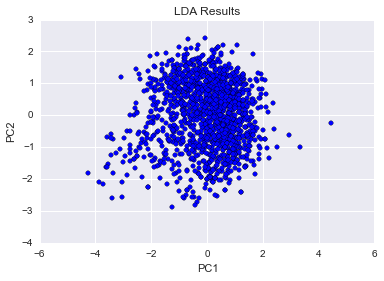

In [288]:
plt.figure()
plt.scatter(new_features[:, 0], new_features[:,1], marker='o')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('LDA Results')

That was a lot of results! Let's summarize. The following characteristics emerged as key predictors across the various models:
 * Age
 * Wife's education
 * Number of children
 * Wife's religion
 * Media exposure

The standard-of-living index emerged as relevant only once so I will not use it moving forward. 
 
Let's use the five features above moving forward in our models. We will also explore all features. 

# Step Fourteen: Logistic Regression

Put simply, [logistic regression](http://blog.yhat.com/posts/logistic-regression-python-rodeo.html) is a common technique used to predict a binary outcome. 

For logistic regression classification, I will first import the relevant *pandas* and Scikit-Learn modules.

In [293]:
import pandas
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression
import numpy as np
import statsmodels.api as sm

Next, I will create a clean DataFrame with only the predictor variables I want to use in the model. The head statement verifies that my subsetting worked. 

In [294]:
keepcol = data[['age', 'w_educat', 'num_child', 'w_religion', 'media',]]
keepcol.head()

,age,w_educat,num_child,w_religion,media
0,24,2,3,1,0
1,45,1,10,1,0
2,43,2,7,1,0
3,42,3,9,1,0
4,36,3,8,1,0


Performing the regression is straightforward. First, I specify the model and fit the target and features Dataframes created in Step 10 above. 

Next, I specify prediction parameters. The expected is the target variable (method type) while the predicted is a model based on the sociodemographic features specified as features. This example uses all features. 

Lastly, the print statements prints metrics describing model fit. This will help me determine how the model performs. 

In [295]:
#Specify Model 
model = LogisticRegression()
model.fit(features, target)
print(model)
# Predictions
expected = target
predicted = model.predict(features)
# Summarize Model Fit 
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
             precision    recall  f1-score   support

          1       0.57      0.66      0.61       629
          2       0.47      0.30      0.37       333
          3       0.45      0.48      0.47       511

avg / total       0.51      0.52      0.51      1473

[[414  42 173]
 [112 100 121]
 [194  72 245]]


*Results suggest a poor model fit (F1 scores closer to 1 are better.)*

Next, I will try logistic regression using the five features that emerged during feature selection. The same code applies except the features DataFrame is swapped with the keepcol Dataframe (created in Step 14). 

In [296]:
#Specify Model 
model = LogisticRegression()
model.fit(keepcol, target)
print(model)
# Predictions
expected = target
predicted = model.predict(keepcol)
# Summarize Model Fit 
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
             precision    recall  f1-score   support

          1       0.56      0.66      0.61       629
          2       0.51      0.29      0.36       333
          3       0.45      0.47      0.46       511

avg / total       0.51      0.51      0.50      1473

[[417  32 180]
 [117  95 121]
 [208  61 242]]


*Results suggest a poor model fit even when using predictve features.*

# Step Fifteen: K-Nearest Neighbors (KNN)

K-Nearest Neighbors (or KNN) uses a distance metric to find the K most similar instances for a new instance and takes the mean outcome of the neighbors as the prediction.

**Check out a great [KNN](http://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/) tutorial here!** 

As always, I will start by importing the relevant *pandas* and Scikit-Learn modules.

In [297]:
import pandas
from sklearn import cross_validation
from sklearn.neighbors import KNeighborsClassifier

Next, I will run the KNN classifier. The code is the same as the logit code - with the only difference being the model = line.  

In [298]:
#Specify Model 
model = KNeighborsClassifier()
model.fit(features, target)
print(model)
# Predictions
expected = target
predicted = model.predict(features)
# Summarize Model Fit 
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
             precision    recall  f1-score   support

          1       0.69      0.79      0.74       629
          2       0.59      0.57      0.58       333
          3       0.67      0.56      0.61       511

avg / total       0.66      0.66      0.66      1473

[[498  46  85]
 [ 87 189  57]
 [138  86 287]]


*This model performed better than the logit model but still doesn't output an impressive score.*

Next, I will try KNN with only the five most predictive features. 

In [299]:
#Specify Model 
model = KNeighborsClassifier()
model.fit(keepcol, target)
print(model)
# Predictions
expected = target
predicted = model.predict(keepcol)
# Summarize Model Fit 
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
             precision    recall  f1-score   support

          1       0.68      0.78      0.73       629
          2       0.54      0.56      0.55       333
          3       0.66      0.53      0.59       511

avg / total       0.64      0.64      0.64      1473

[[492  54  83]
 [ 93 186  54]
 [137 103 271]]


*The KNN model with fewer features performed slightly worse than the model with all features.* 

Overall, however, KNN is a better choice than logistic regression. 

# Step Sixteen: Gaussian Naive Bayes Classification

Naive Bayes methods are supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of independence between every pair of features. 

**Check out the [Naive Bayes](http://scikit-learn.org/stable/modules/naive_bayes.html) Scikit-Learn documentation.**

As always, I will first import the modules needed. Then, I will run the neccesary classifier. The code is the same as the code above - with the only difference being the model = line. As with both examples above, I will run the model with all features and the five most predictive features. 

In [301]:
import pandas
from sklearn import cross_validation
from sklearn.naive_bayes import GaussianNB

In [302]:
#Specify Model 
model = GaussianNB()
model.fit(features, target)
print(model)
# Predictions
expected = target
predicted = model.predict(features)
# Summarize Model Fit 
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

GaussianNB()
             precision    recall  f1-score   support

          1       0.63      0.39      0.48       629
          2       0.37      0.63      0.46       333
          3       0.47      0.48      0.47       511

avg / total       0.52      0.47      0.48      1473

[[246 189 194]
 [ 46 210  77]
 [ 96 172 243]]


In [303]:
#Specify Model 
model = GaussianNB()
model.fit(keepcol, target)
print(model)
# Predictions
expected = target
predicted = model.predict(keepcol)
# Summarize Model Fit 
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

GaussianNB()
             precision    recall  f1-score   support

          1       0.68      0.35      0.47       629
          2       0.39      0.52      0.45       333
          3       0.44      0.61      0.51       511

avg / total       0.53      0.48      0.48      1473

[[223 139 267]
 [ 35 172 126]
 [ 70 129 312]]


*Results suggest that this technique isn't a good one for this data.*

# Step Seventeen: Classification and Regression Trees (CART)

Last, I will explore Classification and Regression Trees (CART), a type of [decision tree](http://scikit-learn.org/stable/modules/tree.html) method that constructs binary trees using the feature and threshold that yield the largest information gain at each node. 

As always, I will first import the relevant modules.

In [304]:
import pandas
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn import metrics

Next, I will run the CART code. 

In [305]:
#Specify Model 
model = DecisionTreeClassifier()
model.fit(features, target)
print(model)
# Predictions
expected = target
predicted = model.predict(features)
# Summarize Model Fit 
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
             precision    recall  f1-score   support

          1       0.95      0.99      0.97       629
          2       0.91      0.96      0.93       333
          3       0.99      0.90      0.95       511

avg / total       0.96      0.95      0.95      1473

[[625   2   2]
 [ 12 319   2]
 [ 20  29 462]]


*Wow - this is a high score - this model might be the best option!*

Now, I will try CART using only five features. 

In [306]:
#Specify Model 
model = DecisionTreeClassifier()
model.fit(keepcol, target)
print(model)
# Predictions
expected = target
predicted = model.predict(keepcol)
# Summarize Model Fit 
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
             precision    recall  f1-score   support

          1       0.80      0.88      0.84       629
          2       0.71      0.75      0.73       333
          3       0.80      0.67      0.73       511

avg / total       0.78      0.78      0.78      1473

[[556  25  48]
 [ 46 251  36]
 [ 92  76 343]]


*The F1 score decreased, indicating that the model performs better with all features.*

# Conclusion and Final Thoughts

Based on the results from this exercise, the highest F1 score (i.e., closest to 1 but not 1) was produced by Classification and Regression Trees (CART). When using all features, the model scored a 0.95, an impressive algorithm score. The next step would be to further explore the CART model. For example, what would results look like using scaled data? Moving forward, additional metrics could be used to assess model fit (i.e., cross validation).  

# Feedback

If you are a beginner, I hope you found this tutorial helpful! If any of the steps need further clarification, please share your suggestions. 

If you are an expert that can recommend clearer explanations or alternative approaches, I am eager to hear your suggestions also! 

# Resources

**Want to learn more? Check out the following resources and tutorials:**
* [Spot-Check Classification Machine Learning Algorithms](http://machinelearningmastery.com/a-gentle-introduction-to-scikit-learn-a-python-machine-learning-library/)
* [Scikit Learn Basic Tutorial](http://scikit-learn.org/stable/tutorial/basic/tutorial.html)
* [Building a Classifier from Census Data](https://districtdatalabs.silvrback.com/building-a-classifier-from-census-data)
* [Kaggle Pima Indian Heritage Data](https://www.kaggle.com/justfor/digit-recognizer/playing-with-pima-indian-heritage-data)